In [1]:
using Revise
using OperatorGrowth

using LinearAlgebra
using SparseArrays
using KrylovKit
using Statistics
using PyPlot
using BenchmarkTools

inspect(obj) = fieldnames(typeof(obj))


using PyPlot
using PyCall
@pyimport seaborn as sns
pal = sns.color_palette("Set1");

9-element Vector{Tuple{Float64, Float64, Float64}}:
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804)
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726)
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098)
 (1.0, 0.4980392156862745, 0.0)
 (1.0, 1.0, 0.2)
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392)
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373)
 (0.6, 0.6, 0.6)

In [3]:
for n in 0:8
    @show n, OperatorGrowth.numYsToδϵ(n)
end

(n, OperatorGrowth.numYsToδϵ(n)) = (0, (false, false))
(n, OperatorGrowth.numYsToδϵ(n)) = (1, (true, true))
(n, OperatorGrowth.numYsToδϵ(n)) = (2, (false, true))
(n, OperatorGrowth.numYsToδϵ(n)) = (3, (true, false))
(n, OperatorGrowth.numYsToδϵ(n)) = (4, (false, false))
(n, OperatorGrowth.numYsToδϵ(n)) = (5, (true, true))
(n, OperatorGrowth.numYsToδϵ(n)) = (6, (false, true))
(n, OperatorGrowth.numYsToδϵ(n)) = (7, (true, false))
(n, OperatorGrowth.numYsToδϵ(n)) = (8, (false, false))


In [3]:
zero(PS)

I

In [4]:
zero(PS).V|>edges

(0, 0)

In [5]:
PS("XXIZ")

1.0 + 0.0im*ZZIX

In [6]:
PSInternal(false,true,Vertex(7,15))

0.0 - 1.0im*YYYX

In [7]:
V1 = Vertex(3,7)
V2 = Vertex(234,543)

1 + 0im*XYXYXZZZIX

In [11]:
commutator(V1,V2)

1-element Vector{PSInternal}:
 -0.0 + 1.0im*ZIIYXZZZIX

In [53]:
OperatorMap(Dict("X"=>1.0))

OperatorMap(Dict{Vertex, ComplexF64}(-1 + 0im*X => 1.0 + 0.0im))

In [55]:
O1 = PS("XX")
O2 = PS("Z")

1.0 + 0.0im*Z

In [96]:
ps = Array{PS,1}()
@btime commutator!($ps, $O1.V, $O2.V,0,1.0);

  8.133 ns (0 allocations: 0 bytes)


In [79]:
rightAlign(PS("XY").V)

start = trailing_zeros(V.v | V.w) = 0


0 - 1im*XY

In [99]:
O0 = OperatorMap(Dict())

OperatorMap(Dict{Vertex, ComplexF64}())

In [115]:
@btime convolve!(O0,O1,O2)

  126.496 ns (0 allocations: 0 bytes)


OperatorMap(Dict{Vertex, ComplexF64}(0 - 1im*XY => 3.764201e7 + 0.0im, 0 - 1im*YX => 9.0945024e7 + 0.0im))

In [124]:
O4 = Operator(PS[])

Operator(PS[])

In [125]:
@btime convolve!(O4,$O1,$O2)

  46.165 ns (1 allocation: 16 bytes)


Operator(PS[0.0 - 1.0im*XY, 0.0 - 1.0im*YX, 0.0 - 1.0im*XY, 0.0 - 1.0im*YX, 0.0 - 1.0im*XY, 0.0 - 1.0im*YX, 0.0 - 1.0im*XY, 0.0 - 1.0im*YX, 0.0 - 1.0im*XY, 0.0 - 1.0im*YX  …  0.0 - 1.0im*XY, 0.0 - 1.0im*YX, 0.0 - 1.0im*XY, 0.0 - 1.0im*YX, 0.0 - 1.0im*XY, 0.0 - 1.0im*YX, 0.0 - 1.0im*XY, 0.0 - 1.0im*YX, 0.0 - 1.0im*XY, 0.0 - 1.0im*YX])

In [146]:
O0 = OperatorMap(Dict())

OperatorMap(Dict{Vertex, ComplexF64}())

In [149]:
@btime convolve!($O0,$O1,$O2)

  33.904 ns (0 allocations: 0 bytes)


OperatorMap(Dict{Vertex, ComplexF64}(0 - 1im*XY => 4.1722008e7 + 0.0im, 0 - 1im*YX => 4.1722008e7 + 0.0im))

In [148]:
@btime hash(Vertex(43,5435))

  1.208 ns (0 allocations: 0 bytes)


0xa896ef5faf29ebbf

In [138]:
@which hash(4,zero(UInt))

hash(x::Int64, h::UInt64) in Base at hashing.jl:75

In [136]:
hash(hash(43) ^ 5435)

0x1ca3d4e0db27b3b1

# Check Correctness

In [41]:
H = OperatorMap(Dict("XX"=>1,"Z"=>-1.05,"X"=>0.5))
L = Liouvillian(H)
O0 = OperatorMap(Dict("XX"=>1.05,"Z"=>1))

OperatorMap(Dict{Vertex, ComplexF64}(-1 + 0im*Z => 1.0 + 0.0im, -1 + 0im*XX => 1.05 + 0.0im))

In [53]:
O1 = OperatorMap()
@btime mul!(O2,$L,$O0) setup=(O2=OperatorMap())

  141.932 ns (0 allocations: 0 bytes)


OperatorMap(Dict{Vertex, ComplexF64}(0 - 1im*Y => 849.0 + 0.0im, 0 - 1im*XY => 3570.0449999999605 + 0.0im, 0 - 1im*YX => 3570.0449999999605 + 0.0im))

In [270]:
using KrylovKit
H = OperatorMap(Dict("XX"=>1,"Z"=>-1.05,"X"=>0.5))
L = Liouvillian(H)
# O0 = OperatorMap(Dict("XX"=>1.05,"Z"=>1))
O0 = OperatorMap(Dict("Z"=>1))

OperatorMap(Dict{Vertex, ComplexF64}(-1 + 0im*Z => 1.0 + 0.0im))

In [271]:
iter = LanczosIterator(L,O0);

In [272]:
count(x->abs(x)<1e-16,values(F.V[end].terms))

0

In [273]:
#run Lanczos
N=30
n=0
F = initialize(iterator)
@time while n < N
    expand!(iterator, F)
    trim!(F.r,1e-16)
    n+=1
end
bs = F.βs

  7.509405 seconds (958 allocations: 1.543 GiB, 2.40% gc time)


31-element Vector{Float64}:
  4.158800819567715
  4.314016265420326
  4.5036502624768655
  4.790682787293234
  5.154864668411114
  5.587100849566082
  6.064827806542057
  6.6829229829019985
  7.41393735361118
  7.906782344770846
  8.092216697152784
  8.408788087833353
  8.849586878134259
  ⋮
 11.618371901676662
 11.935593617995066
 12.326810931042187
 12.730010984806992
 13.090829032745516
 13.439797732741384
 13.86504616517856
 14.242000611563505
 14.589243953657707
 14.881443744538407
 15.186869908614316
 15.570582257651687

In [258]:
Xiangyu_values = vec([4.15880082  4.31401627  4.50365026  4.79068279  5.15486467  5.58710085 6.06482781  6.68292298  7.41393735  7.90678234  8.0922167   8.40878809 8.84958688  9.2086087   9.59364746 10.07842675 10.53190668 10.97745372 11.33212599 11.6183719]);

In [263]:
bs

31-element Vector{Float64}:
  4.158800819567715
  4.314016265420326
  4.5036502624768655
  4.790682787293234
  5.154864668411114
  5.587100849566082
  6.064827806542057
  6.6829229829019985
  7.41393735361118
  7.906782344770846
  8.092216697152784
  8.408788087833353
  8.849586878134259
  ⋮
 11.618371901676662
 11.935593617995066
 12.326810931042187
 12.730010984806992
 13.090829032745516
 13.439797732741384
 13.86504616517856
 14.242000611563505
 14.589243953657707
 14.881443744538407
 15.186869908614316
 15.570582257651687

In [265]:
for n in eachindex(bs)
    println(abs(bs[n]-Xiangyu_values[n]))
end

4.3228443047382825e-10
4.5796735292924495e-9
2.4768658235529983e-9
2.7067663666002773e-9
1.588886355818886e-9
4.339177905876568e-10
3.4579423768832385e-9
2.901998641391401e-9
3.611179799634101e-9
4.770845940527124e-9
2.8472157964642975e-9
2.166647306012237e-9
1.8657413392020317e-9
1.6911982925194025e-9
2.740055293770638e-9
2.6614319637019435e-9
4.005597631362434e-9
1.6487611276261305e-10
1.1827285817389566e-9
1.6766623645025902e-9


LoadError: BoundsError: attempt to access 20-element Vector{Float64} at index [21]

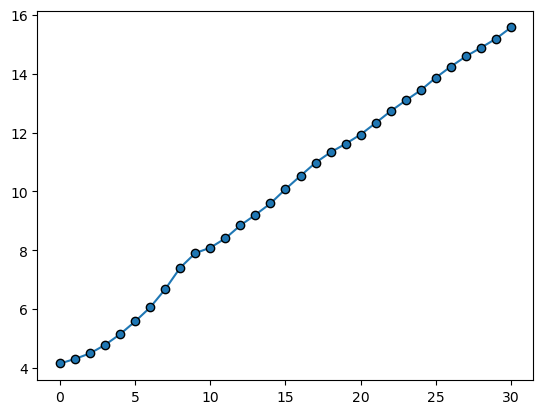

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x2ad3ba1f0>

In [274]:
plot(bs,"-o",mec="k",mew=1)

# Pauli Bases

In [330]:
BPS(true,false,Vertex(1,1))

1.0 + 0.0im*Y

In [335]:
split(PS("XXIIIX"))

(1.0 + 0.0im, 1.0 + 0.0im*XXIIIX)

In [356]:
z,BP = split(PS("Y"))

(numYs, Vertex(v, w)) = (1, 0 - 1im*Y)


(-1.0 - 0.0im, -1.0 + 0.0im*Y)

In [483]:
for _ in 1:1000
    P = random_pauli(rand(1:10))
    z, BP = split(P)
    @assert z*PS(BP) == P
end

In [494]:
split(PS("YY"))[2]

1.0 - 0.0im*YY

In [507]:
pb = pauli_basis(3)

OperatorGrowth.Basis{BPS}("Pauli Basis 3", Dict{BPS, Int64}(-0.0 - 1.0im*YZY => 47, 1.0 + 0.0im*XZ => 8, 1.0 + 0.0im*YZX => 23, 1.0 + 0.0im*XIX => 14, 0.0 + 1.0im*YYZ => 45, I => 1, 1.0 + 0.0im*ZX => 6, 0.0 + 1.0im*XYX => 21, 1.0 + 0.0im*YXX => 19, 1.0 + 0.0im*ZZ => 10…), Dict{Int64, BPS}(5 => 1.0 + 0.0im*XX, 16 => 1.0 + 0.0im*ZIX, 20 => 1.0 + 0.0im*XZX, 35 => -0.0 - 1.0im*YIY, 30 => 1.0 + 0.0im*ZIZ, 19 => 1.0 + 0.0im*YXX, 32 => 1.0 + 0.0im*ZXZ, 49 => 1.0 + 0.0im*YYY, 6 => 1.0 + 0.0im*ZX, 45 => 0.0 + 1.0im*YYZ…), [4, 13, 49])

In [2]:
H = OperatorMap(Dict("XX"=>1,"Z"=>-1.05,"X"=>0.5))
L = Liouvillian(H)
O0 = OperatorMap(Dict("XX"=>1.05,"Z"=>1))

OperatorMap(Dict{Vertex, ComplexF64}(-1 + 0im*Z => 1.0 + 0.0im, -1 + 0im*XX => 1.05 + 0.0im))

In [102]:
pb = pauli_basis(6);
length(pb)

3072

In [103]:
G = build_graph(L,pb)

3072×3072 SparseMatrixCSC{ComplexF64, Int64} with 27648 stored entries:
⢿⣷⣶⢦⣤⢀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠸⣟⢻⣶⣿⡲⢤⣁⠁⠐⠰⠠⠄⡄⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⢛⢻⡻⠿⣧⣤⣨⡙⠲⠄⠀⠀⠀⠀⣬⠈⠃⠂⠦⠀⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠠⠄⢳⡀⣻⣿⣿⣘⡦⡀⠀⠀⠀⠀⠈⠳⣤⡀⠀⠀⠀⠀⠈⠁⠀⠲⠀⢠⡀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⢁⠀⢳⡈⠲⡼⣿⣿⡆⠀⠀⠀⠀⠀⠀⠈⠻⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠀⠘⠀⠀⠄⠀⢀⠀
⠀⠀⠐⡂⠀⠁⠀⠈⠈⠉⣿⣿⣾⢢⡀⠓⣄⠀⠀⠈⠙⠒⢦⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀
⠀⠀⠀⠥⠀⠀⠀⠀⠀⠀⠺⣛⢻⣶⣾⡂⠀⠳⢄⠀⠀⠀⠀⠈⠙⠲⠤⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠘⡀⣤⡀⠀⠀⠀⢤⠈⠺⠻⠿⣧⣤⡠⡈⠳⠀⠀⠀⠀⠀⠀⠀⠈⠙⠲⢤⣀⡀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠦⠀⠙⣦⡀⠀⠀⠙⢤⡀⠀⡻⣿⣿⣉⣦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠲⢤⣀⠀⠀⠀⠀
⠀⠀⠀⠀⠨⡄⠀⠈⠛⢦⡀⠀⠀⠑⢦⡈⠣⣼⣿⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠓⢦⣀
⠀⠀⠀⠀⠀⢤⠀⠀⠀⠀⢳⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣿⡞⢦⡈⠳⣄⠀⠀⠈⠱⣄⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⡀⠀⠀⠀⠈⢳⡀⠀⠀⠀⠀⠀⠀⠀⠺⣍⣻⣾⣯⠀⠈⠳⢄⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀⠀⢳⡀⠀⠀⠀⠀⠀⠀⢦⡈⠋⠛⠻⣦⣦⣦⡈⠓⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠘⠂⠀⠀⠀⠀⠀⢧⡀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠨⣿⠿⣧⣹⡢⠀⠀⠀⠀⠀⠈⠓⣄⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠲⠀⠀⠀⠀⠀⠀⢳⡀⠀⠀⠀⠀⡀⠀⠀⠑⢦⠈⠳⡺⣿⣿⣀⡀⡀⠀⢀⠀⠀⠈⠳⢄
⠀⠀⠀⠀⠀⠀⠀⠠⡄⠀⠀⠀⠀⠀⠀⢳⠀⠀⠀⠀⠑⢦⡀⠀⠀⠀⠀⠀⠀⠸⣿⣿⡏⢦⡈⠱⣄⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⣀⠀⠀⠀⠀⠀⠀⠈⢣⡀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠈⠫⣍⣿⣿⣯⠀⠈⠓⣄⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢳⡀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠐⢆⡈⠋⠛⢻⣶⣦⣦⡀⠓
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀⠀⠀⠀⠀⢧⠀⠀⠀⠀⠀⠀⠀⠙⢤⡀⠀⠀⠙⢦⠀⠨⣿⠿⣧⣽⡢
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⠂⠀⠀⠀⠀⠀⠀⠀⠈⢳⠀⠀⠀⠀⠀⠀⠀⠀⠙⢆⠀⠀⠀⠙⢤⠈⠳⡻⣿⣿

In [104]:
function get_evs(basis, matrix;verbose=true)
    evs = []
    ranges = partitions(basis)
    for (n,ra) in enumerate(ranges)
        verbose && @show(n,ranges[n])
        m = collect(matrix[ra,ra])
        push!(evs,eigvals(m))
    end
    return evs
end

function get_conds(basis, matrix;verbose=true)
    evs = []
    ranges = partitions(basis)
    for (n,ra) in enumerate(ranges)
        verbose && @show(n,ranges[n])
        m = collect(matrix[ra,ra])
        push!(evs,cond(m))
    end
    return evs
end

get_conds (generic function with 1 method)

In [105]:
conds0 = get_conds(pb,G;verbose=false);

In [106]:
conds0

6-element Vector{Any}:
 Inf
  4.420765834464647e16
  9.06721831206501e16
  3.0031517782011846e17
  2.3039780714164906e17
  5.901817000232691e17

In [107]:
evs0 = get_evs(pb,G;verbose=false);
evs_list = [evs0];

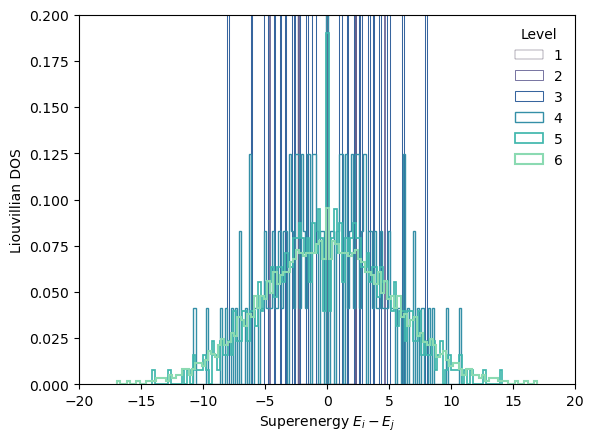

In [108]:
fig,axs = subplots(1,1)
pals = sns.color_palette("mako",length(evs0))
for n in 1:1
    ax=axs
    for (n,ev) in enumerate(evs_list[n])
        ax.hist(ev,lw=0.25*n,histtype="step",bins=129,density=true,color=pals[n],label=n)
    end
    ax.legend(title="Level",frameon=false)
    # ax.set_title(names[n])
    ax.set_xlim(-20,20)
    ax.set_ylim(0,0.2)
    ax.set_ylabel("Liouvillian DOS")
    ax.set_xlabel(L"Superenergy $E_i - E_j$")
end

In [109]:
evsfixed = [filter(x->abs(x)>1e-12,ev) for ev in evs0];

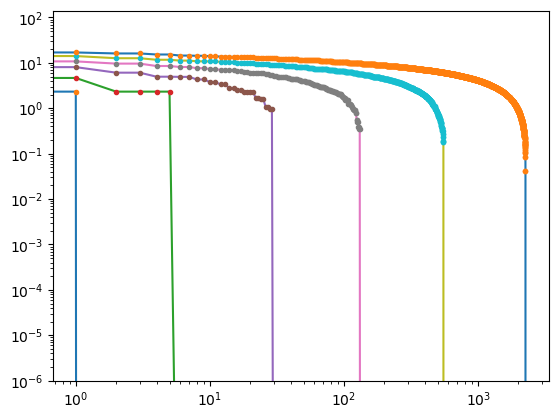

(1.0e-6, 138.27845685319795)

In [110]:
for (ev,evf) in zip(evs0,evsfixed)
    plot(sort(abs.(ev),rev=true))
    plot(sort(abs.(evf),rev=true),".")
end
xscale("log")
yscale("log")
ylim(1e-6)

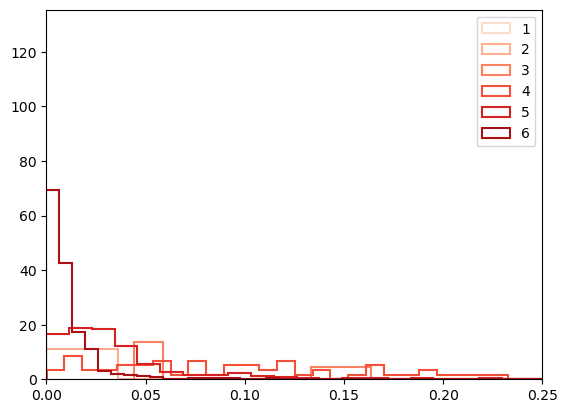

In [111]:
fig,axs = subplots(1,1)
pals = sns.color_palette("Reds",length(evs0))
for n in 1:1
    ax=axs
    for (n,ev) in enumerate(evs_list[n][1:end])
        ev = filter(x->abs(x)>1e-13,ev)
        ax.hist(diff(ev),lw=1.5,bins=129,density="true",histtype="step",color=pals[n],label=n)
    end
    ax.legend()
    ax.set_xlim(0,0.25)
    # ax.set_title(names[n])
end

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


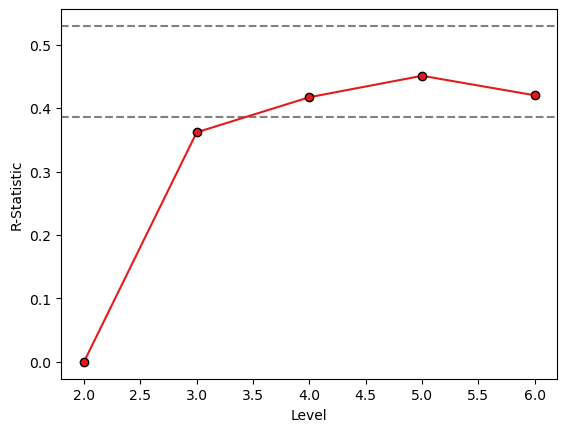

PyObject <matplotlib.legend.Legend object at 0x2a21b4e20>

In [112]:
for n in 1:1
    plot(1:length(evs0),map(r_statistic,evsfixed),"-o",mew=1,mec="k",color=pal[n]) #,label=names[n])
end
axhline(0.5295,ls="--",color="gray",zorder=-1)
axhline(2*log(2) − 1,ls="--",color="gray",zorder=-1)
xlabel("Level")
ylabel("R-Statistic")
legend(frameon=false)


In [136]:
es = evs0[end];

In [160]:
# v0 = vec(O0,pb);
ra = partitions(pb)[end]
Lmat = G[ra,ra];
v0 = rand(ComplexF64,length(ra));
v0 += conj(v0);
# v0 = zeros(ComplexF64,length(ra))
# v0[1] = 1.0

In [161]:
N=129
iterator = LanczosIterator(Lmat,v0,ClassicalGramSchmidt2());
n=0
F = initialize(iterator)
while n < N
    expand!(iterator, F)
    n+=1
end
bs = F.βs;

In [162]:
M = rayleighquotient(F);
D,Z = eigen(M);

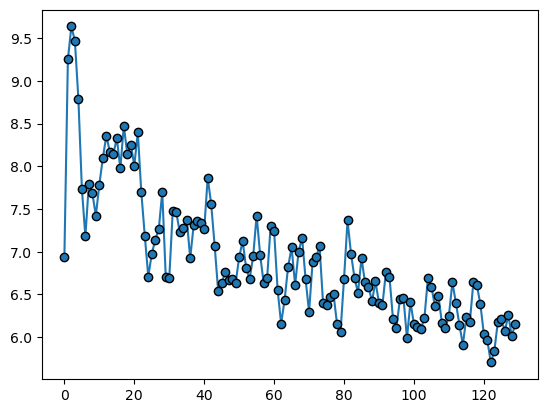

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x2baf1be50>

In [163]:
plot(F.βs,"-o",mec="k",mew=1)

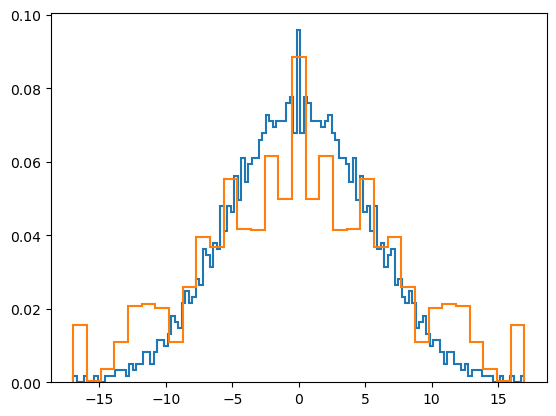

([0.015575520295428547, 0.00042665528136077134, 0.003718010357014532, 0.010901059350113202, 0.020616466596557748, 0.021282302403564705, 0.020318800700070493, 0.010852736468058746, 0.0259602242584882, 0.03949141657192667  …  0.03949141657192697, 0.025960224258488512, 0.010852736468059393, 0.020318800700070794, 0.021282302403565066, 0.02061646659655688, 0.010901059350113046, 0.0037180103570145446, 0.0004266552813607874, 0.015575520295428929], [-16.960410097243503, -15.93250645498632, -14.90460281272914, -13.876699170471959, -12.848795528214776, -11.820891885957593, -10.792988243700412, -9.765084601443231, -8.737180959186048, -7.7092773169288655  …  7.709277316928862, 8.737180959186045, 9.765084601443228, 10.792988243700407, 11.82089188595759, 12.848795528214772, 13.876699170471952, 14.904602812729134, 15.932506454986317, 16.960410097243496], PyObject[PyObject <matplotlib.patches.Polygon object at 0x2ab9ac9a0>])

In [168]:
hist(es,lw=1.5,histtype="step",density=true, bins=129)
hist(D,weights=abs2.(Z[1,:]),lw=1.5,histtype="step",density=false, bins=33)
# [axvline(e) for e in eigvals(M)]
# for n in axes(M,1)
#     plot([D[n],D[n]],[0,pi*abs2.(Z[1,n])],color="k")
# end

In [170]:
import Pkg; Pkg.add("DifferentialEquations")
using DifferentialEquations

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Polyester ──────────────────────── v0.6.18
   Installed TriangularSolve ────────────────── v0.1.15
   Installed SLEEFPirates ───────────────────── v0.6.37
   Installed Static ─────────────────────────── v0.8.2
   Installed RecursiveArrayTools ────────────── v2.32.2
   Installed FiniteDiff ─────────────────────── v2.17.0
   Installed DiffEqBase ─────────────────────── v6.108.0
   Installed SciMLBase ──────────────────────── v1.73.1
   Installed SimpleNonlinearSolve ───────────── v0.1.0
   Installed NLSolversBase ──────────────────── v7.8.3
   Installed LayoutPointers ─────────────────── v0.1.12
   Installed LinearSolve ────────────────────── v1.29.0
   Installed BitTwiddlingConvenienceFunctions ─ v0.1.5
   Installed PolyesterWeave ─────────────────── v0.1.11
   Installed LogExpFunctions ────────────────── v0.3.19
   Installed LoopVectorization ──────────────── v0.12.141
   Installed